# FINAL PROJECT: 

## Introduction

## Import Libraries

Install dan import libraries yang digunakan.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error 

import warnings
warnings.filterwarnings("ignore")

In [65]:
mpl.style.use(['ggplot'])

## Data Loading

In [66]:
# data = pd.read_csv('C:/Kuliah/Studi Independen/heart_failure.csv')
data = pd.read_csv('E:/Cool Yeah/Hacktiv8/Final-Project_Kelompok4/Data/heart_failure.csv')

Memanggil bagian kepala data.

In [67]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Memanggil bagian ekor data.

In [68]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Mengecek dimensi data.

In [69]:
data.shape

(299, 13)

Dari hasil diatas terdapat 145.460 baris data dan 23 kolom data

Mengecek info dataset.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Mengecek tipe data apa saja yg ada pada variabel.

In [71]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Terdapat 3 variabel bertipe float dan 10 variabel bertipe integer

Statistik Deskriptif.

In [72]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Mengecek atribut data.

In [73]:
data.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [74]:
data.creatinine_phosphokinase.value_counts()

582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64

In [75]:
data.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [76]:
data.ejection_fraction.value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
65     1
14     1
80     1
70     1
Name: ejection_fraction, dtype: int64

In [77]:
data.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [78]:
data.platelets.value_counts()

263358.03    25
221000.00     4
279000.00     4
271000.00     4
305000.00     4
             ..
227000.00     1
289000.00     1
300000.00     1
217000.00     1
742000.00     1
Name: platelets, Length: 176, dtype: int64

In [79]:
data.serum_creatinine.value_counts()

1.00    50
1.10    32
0.90    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
2.10     5
1.50     5
0.60     4
1.80     4
2.30     3
2.70     3
2.50     3
3.50     2
2.40     2
3.00     2
0.50     1
5.00     1
0.75     1
6.10     1
3.40     1
3.70     1
9.00     1
4.00     1
3.20     1
5.80     1
2.90     1
2.00     1
2.20     1
6.80     1
9.40     1
4.40     1
3.80     1
Name: serum_creatinine, dtype: int64

In [80]:
data.serum_sodium.value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
127     3
143     3
128     2
129     2
121     1
116     1
146     1
126     1
124     1
113     1
125     1
148     1
Name: serum_sodium, dtype: int64

In [81]:
data.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [82]:
data.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [83]:
data.time.value_counts()

250    7
187    7
10     6
186    6
107    6
      ..
97     1
96     1
86     1
77     1
285    1
Name: time, Length: 148, dtype: int64

In [84]:
data.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [85]:
data['DEATH_EVENT'].value_counts()/len(data)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

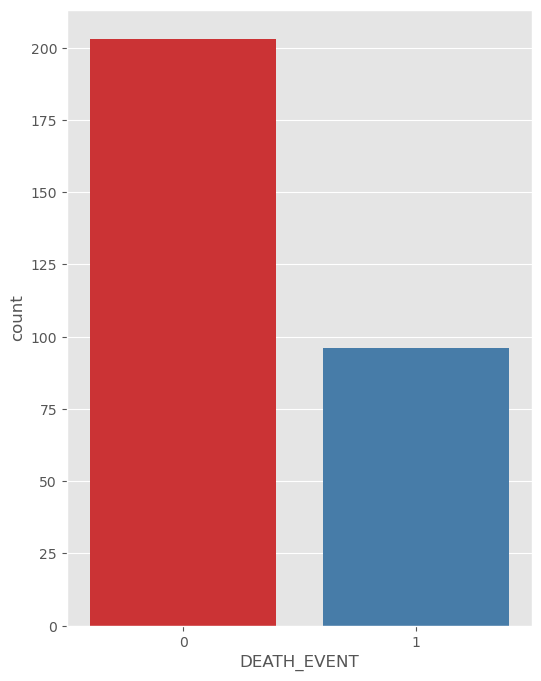

In [86]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="DEATH_EVENT", data=data, palette="Set1")
plt.show()

Kolom DEATH_EVENT yang merupakan Target memiliki value 0 dengan jumlah 203 dan value 1 dengan jumlah 96. Ini menunjukan bahwa ada ketidakseimbangan pada data atau imbalance.

## Data Cleaning

Mengecek jumlah data yang memiliki duplicate.

In [87]:
data.duplicated().sum()

0

Mengecek apakah masih terdapat data duplicated pada data dan hasilnya tidak ada.

In [88]:
data.duplicated().value_counts()

False    299
dtype: int64

### Mengisi Missing Value

In [89]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Data Exploration

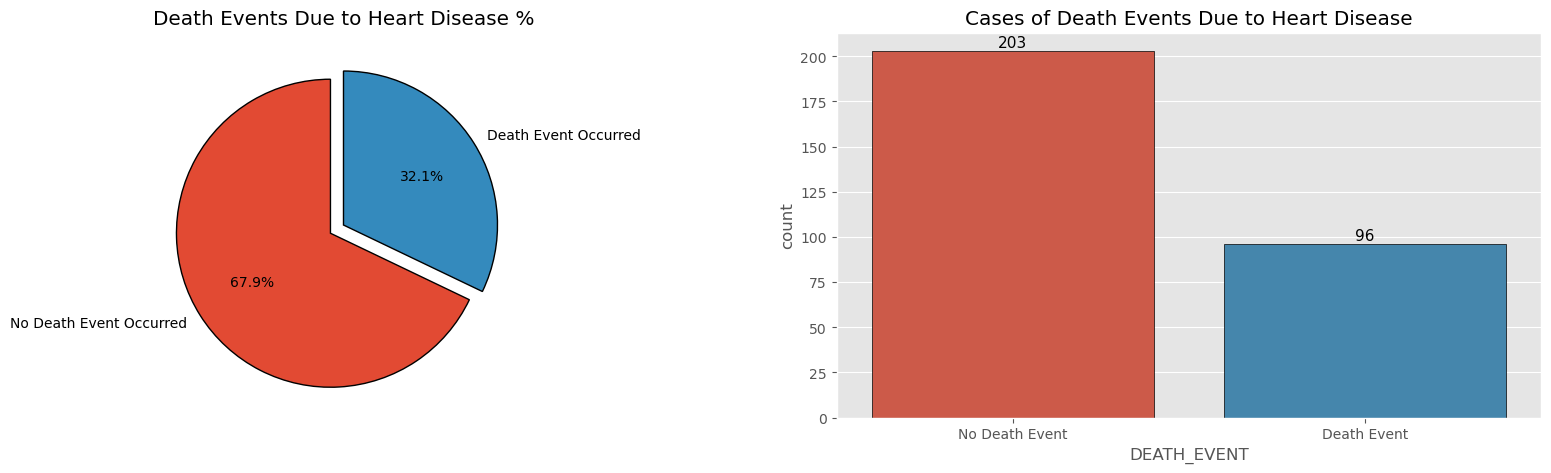

In [90]:
l = list(data['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Death Event Occurred','Death Event Occurred'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Death Events Due to Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot('DEATH_EVENT',data = data, edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
plt.title('Cases of Death Events Due to Heart Disease');
plt.show()

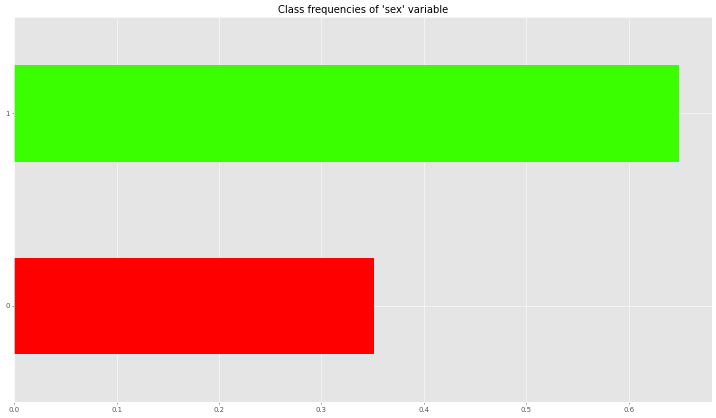

In [91]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

(data["sex"].value_counts(ascending = True, normalize = True)
 .plot.barh(color= ["#FF0000", "#3AFF00"])
 .set_title("Class frequencies of 'sex' variable"));

Pria = 1
Wanita = 0

0    170
1    129
Name: anaemia, dtype: int64


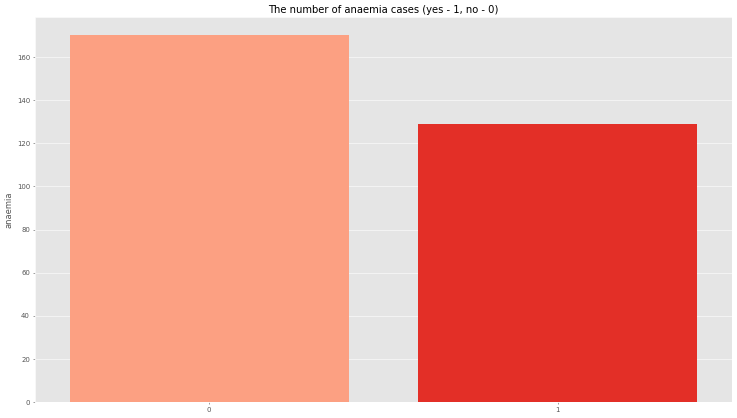

In [92]:
print(data["anaemia"].value_counts())
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

sns.barplot(x = data["anaemia"].value_counts().index,
            y = data["anaemia"].value_counts(),
            data = data, palette = "Reds",
            saturation = 1).set(title = "The number of anaemia cases (yes - 1, no - 0)");

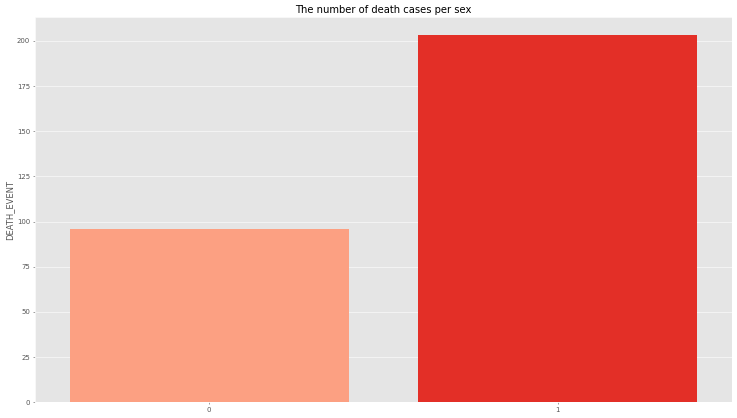

In [93]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(x = data["sex"].value_counts().index,
            y = data["DEATH_EVENT"].value_counts(),
            data = data, palette = "Reds", 
            saturation = 1).set(title = "The number of death cases per sex");

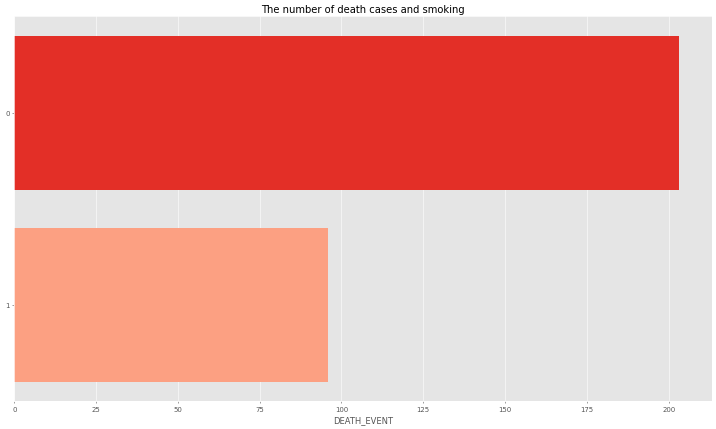

In [94]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(y = data["smoking"].value_counts().index,
            x = data["DEATH_EVENT"].value_counts(),
            data = data, palette = "Reds_r", 
            saturation = 1,
            orient = "h").set(title = "The number of death cases and smoking");

Mengecek Outlier

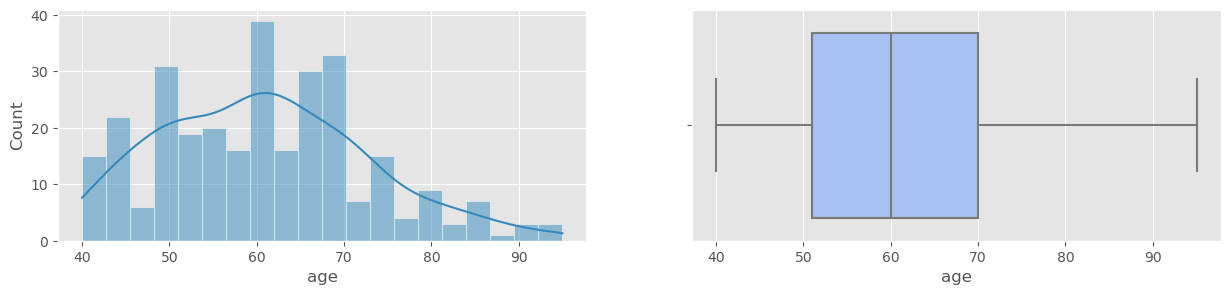

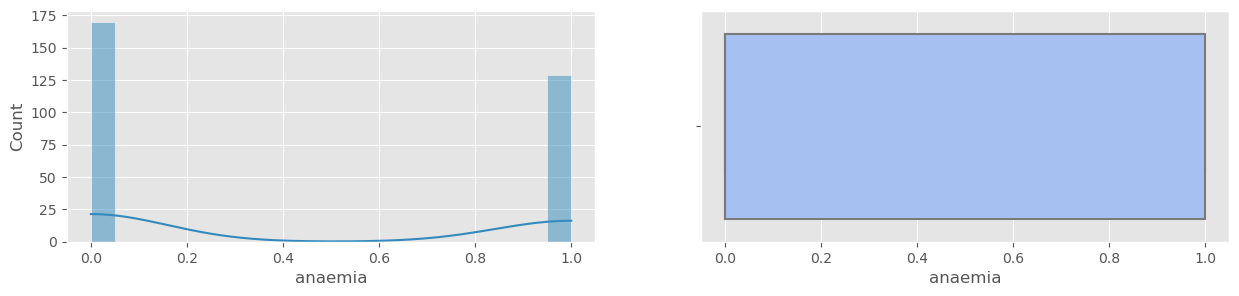

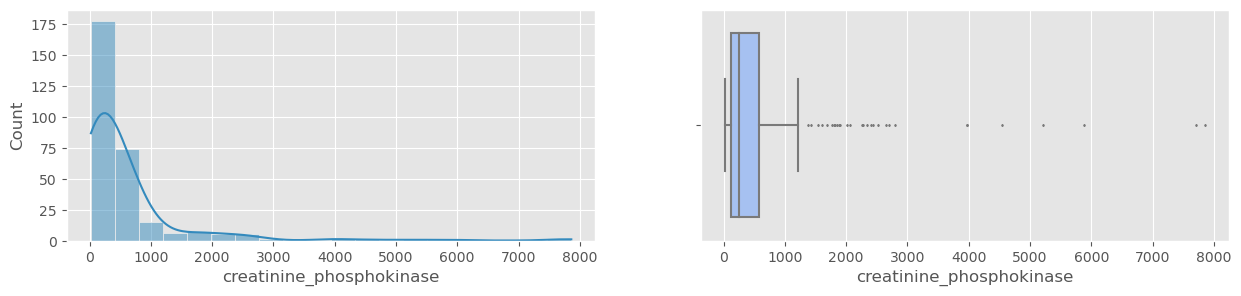

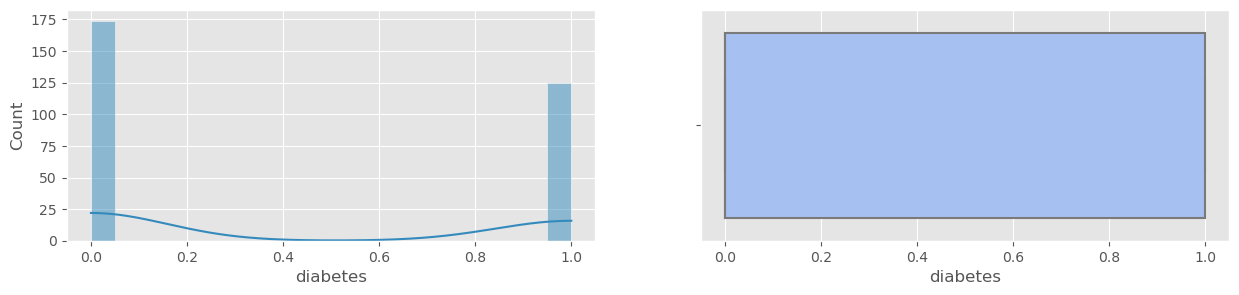

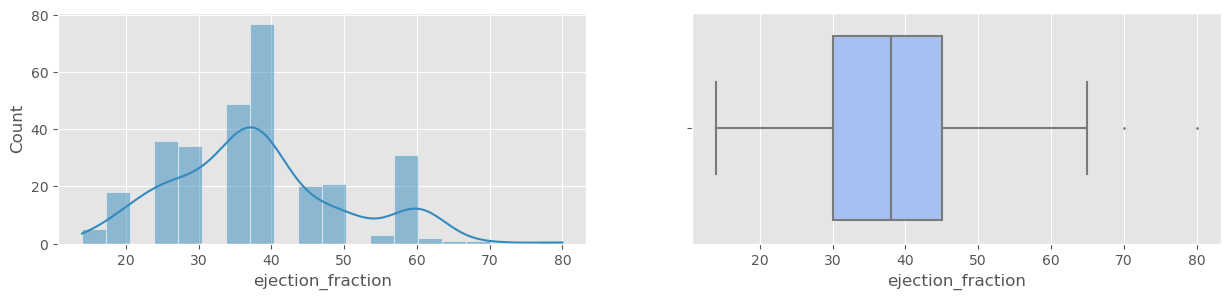

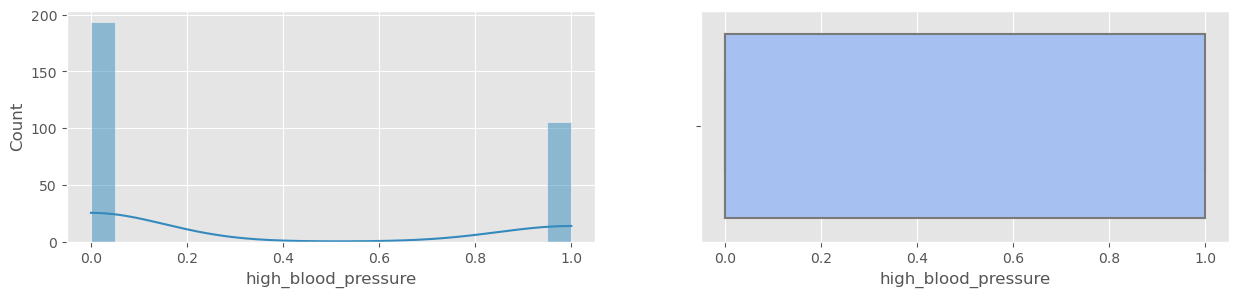

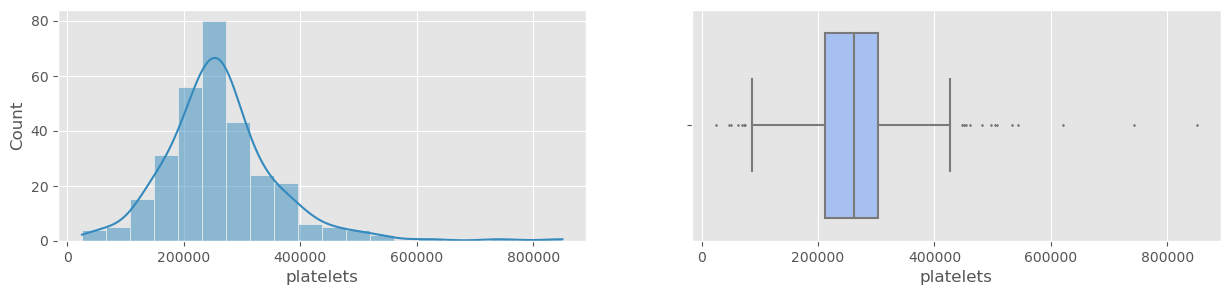

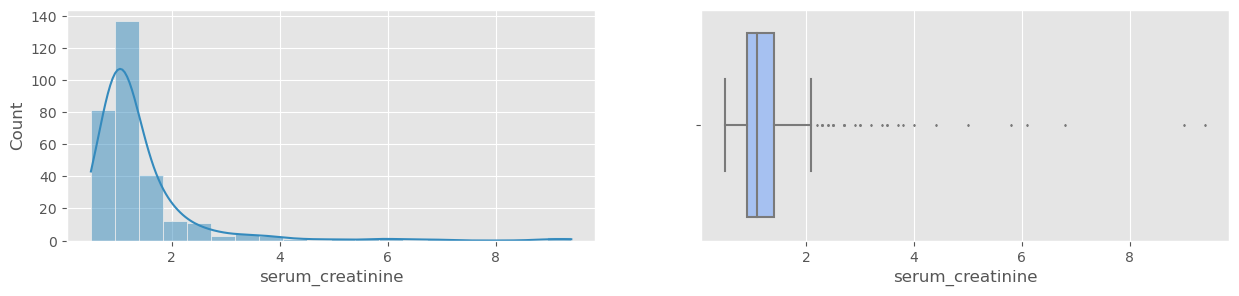

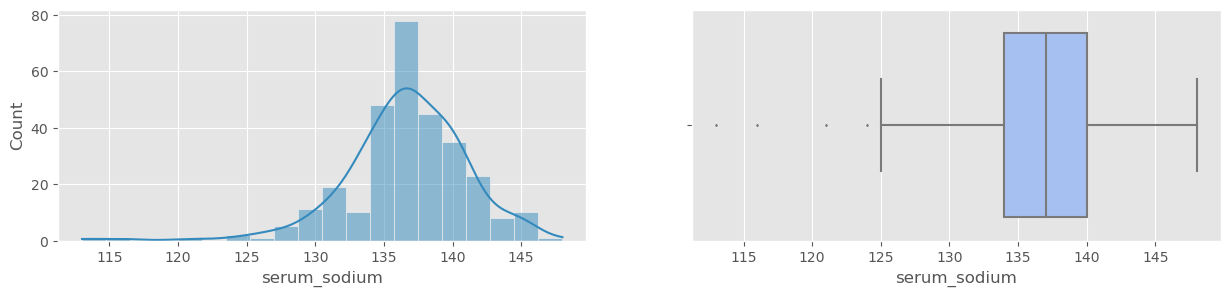

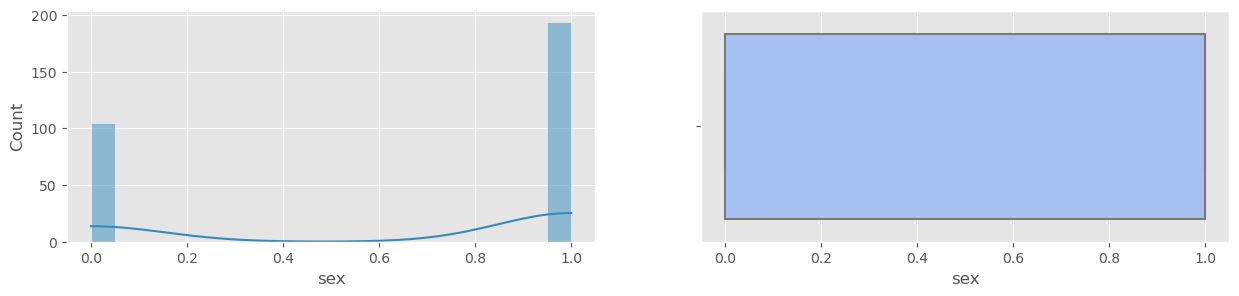

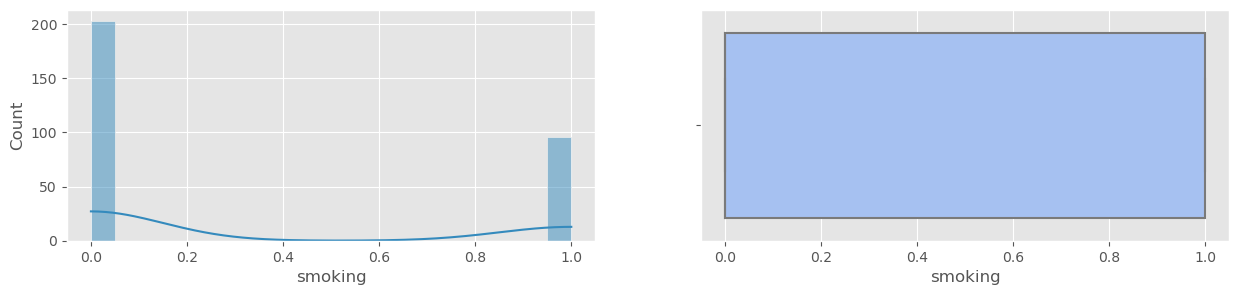

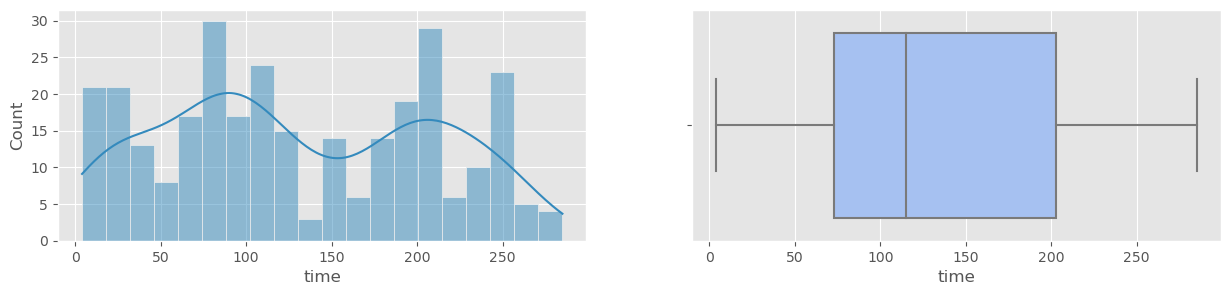

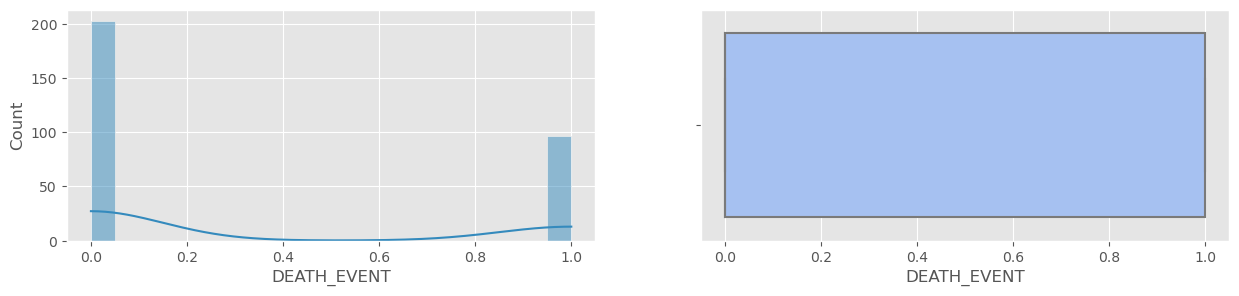

In [95]:
col = list(data.columns)
for i in col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

Menampilkan Heatmap.

<AxesSubplot:>

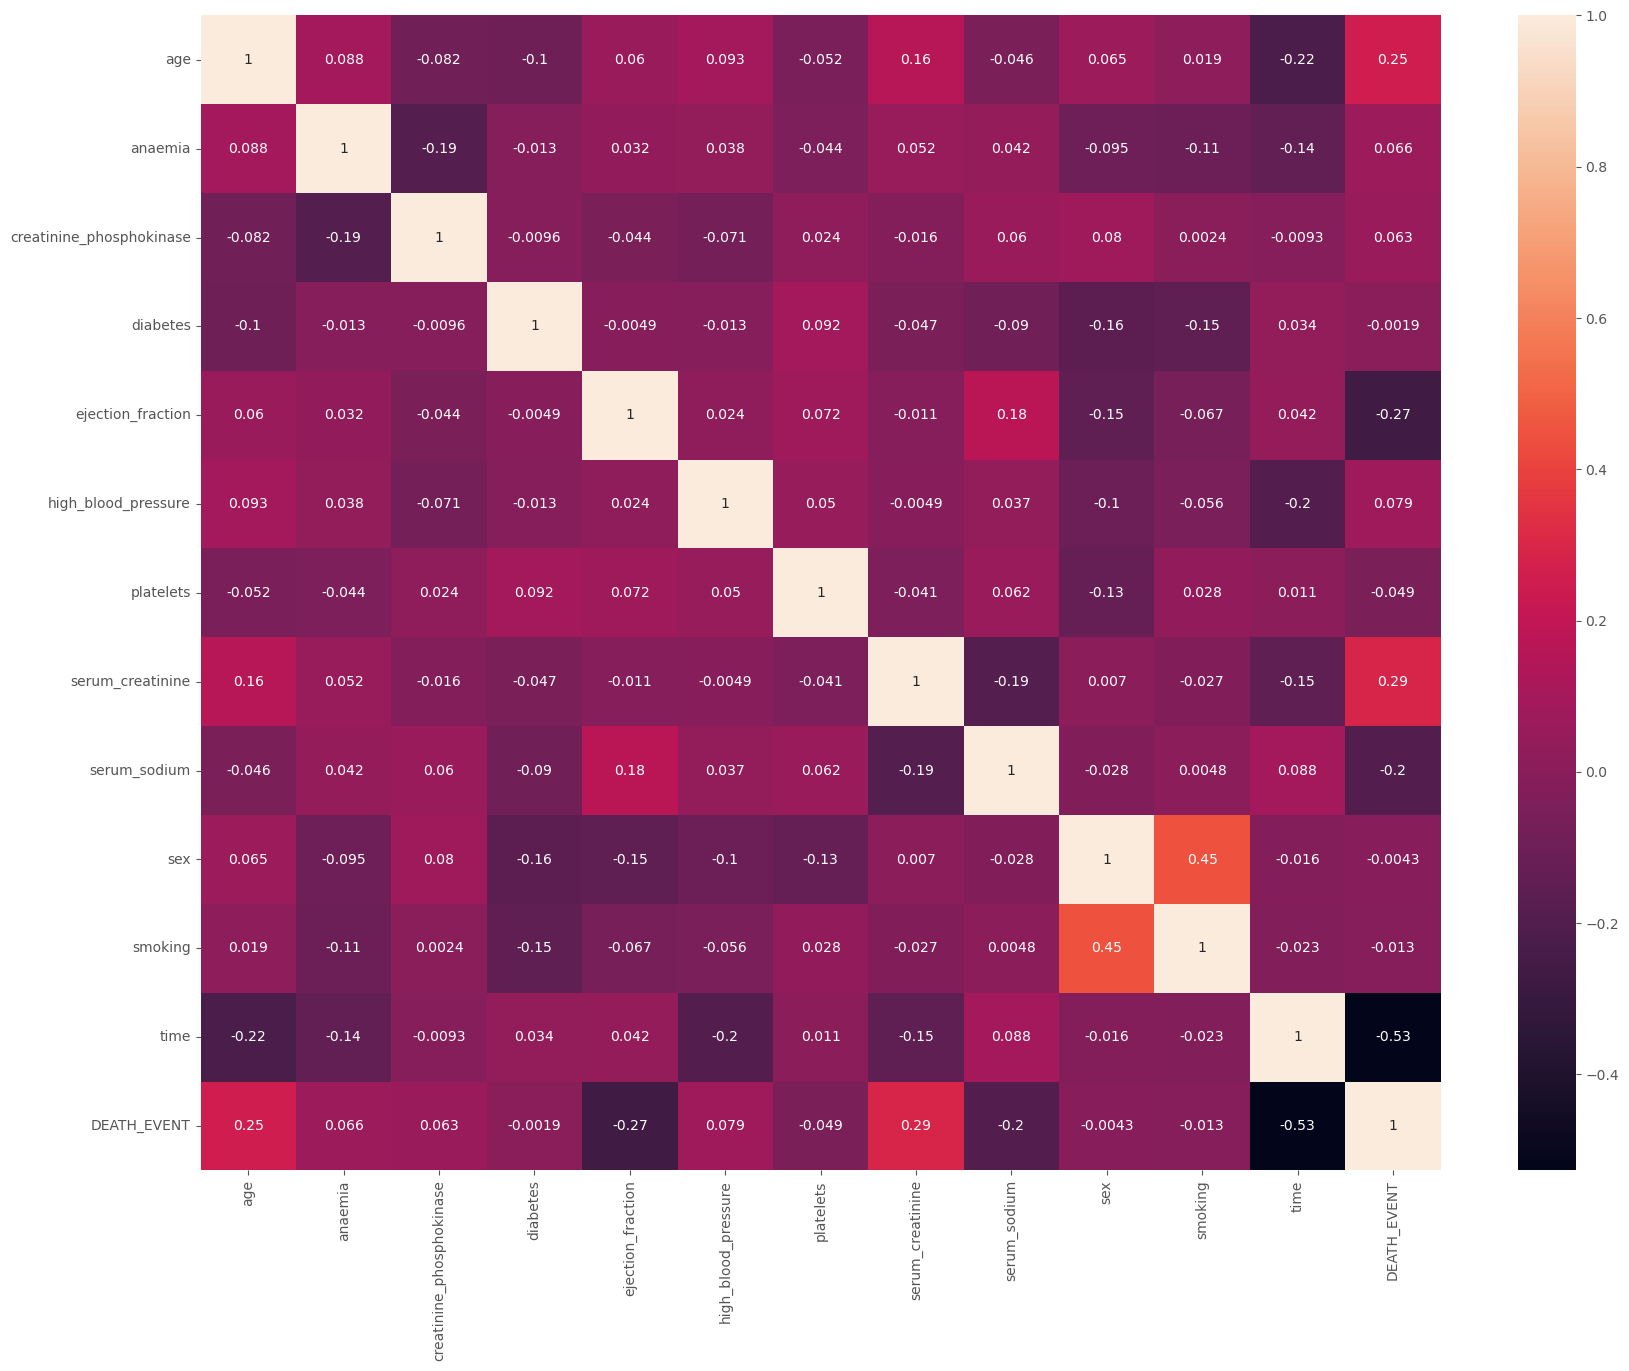

In [96]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

## Data Preprocessing

In [97]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
data['age'] = mms.fit_transform(data[['age']])
data['creatinine_phosphokinase'] = mms.fit_transform(data[['creatinine_phosphokinase']])
data['ejection_fraction'] = mms.fit_transform(data[['ejection_fraction']])
data['serum_creatinine'] = mms.fit_transform(data[['serum_creatinine']])
data['time'] = mms.fit_transform(data[['time']])

# Standardization
data['platelets'] = ss.fit_transform(data[['platelets']])
data['serum_sodium'] = ss.fit_transform(data[['serum_sodium']])
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,1.681648e-02,0.157303,-1.504036,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,7.535660e-09,0.067416,-0.141976,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,-1.038073e+00,0.089888,-1.731046,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,-5.464741e-01,0.157303,0.085034,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,6.517986e-01,0.247191,-4.682176,0,0,0.014235,1


### Split Data

In [98]:
x=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

Menampilkan variabel X.

In [99]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0,0.071319,0,0.090909,1,1.681648e-02,0.157303,-1.504036,1,0,0.000000
1,0.272727,0,1.000000,0,0.363636,0,7.535660e-09,0.067416,-0.141976,1,0,0.007117
2,0.454545,0,0.015693,0,0.090909,0,-1.038073e+00,0.089888,-1.731046,1,1,0.010676
3,0.181818,1,0.011227,0,0.090909,0,-5.464741e-01,0.157303,0.085034,1,0,0.010676
4,0.454545,1,0.017479,1,0.090909,0,6.517986e-01,0.247191,-4.682176,0,0,0.014235


Menampilkan variabel Y.

In [100]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [101]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(random_state = 0)
x_oversampling, y_oversampling = oversampling.fit_resample(x, y)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_oversampling, y_oversampling, test_size=0.2, random_state=0)

Dalam hal ini dilakukan pemisahan data dengan ukuran data testing adalah 30% dan ukuran data training adalah 70%  yang diambil secara acak dengan nomor generator 1. Nomor ini menandakan nomor pengacakan agar jika di run kembali, pengacakan data akan tetap sama. Data training (X_train, Y_train) berguna untuk membangun model yang hasilnya akan digunakan untuk memprediksi X_test, kemudian hasil prediksinya dievaluasi dengan mengacu pada Y_test

In [103]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(324, 12)
(324,)
(82, 12)
(82,)


## Model Definition

## Model Training

### Random Forest

#### Create a model and fit it

In [104]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

#### Get results

In [105]:
print('train score : ', rf_model.score(x_train, y_train))

train score :  1.0


### Gradient Boosting

#### Create a model and fit it

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier()
gbc_model.fit(x_train, y_train)

GradientBoostingClassifier()

#### Get results

In [107]:
print('train score : ', gbc_model.score(x_train, y_train))

train score :  0.9938271604938271


## Model Evaluation & Inference

### Random Forest

In [108]:
rf_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, rf_pred)
print('predicted response: ', rf_model, sep='\n')
print('Testing Accuracy: ',accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, rf_pred))

predicted response: 
RandomForestClassifier()
Testing Accuracy:  0.9146341463414634
Mean squared error: 0.09


<AxesSubplot:>

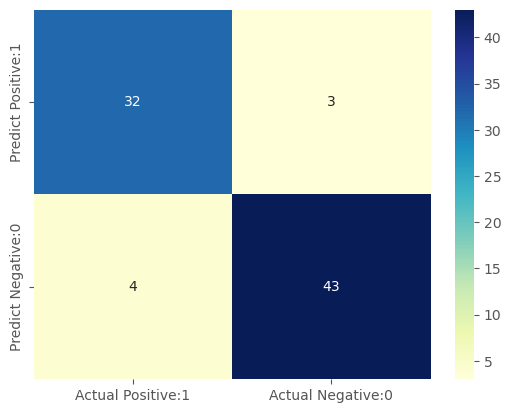

In [109]:
cm = confusion_matrix(y_test, rf_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Gradient Boosting

In [110]:
gbc_pred = gbc_model.predict(x_test)
accuracy = accuracy_score(y_test, gbc_pred)
print('predicted response: ', gbc_pred, sep='\n')
print('Testing Accuracy: ',accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, gbc_pred))

predicted response: 
[0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 0 0]
Testing Accuracy:  0.8658536585365854
Mean squared error: 0.13


<AxesSubplot:>

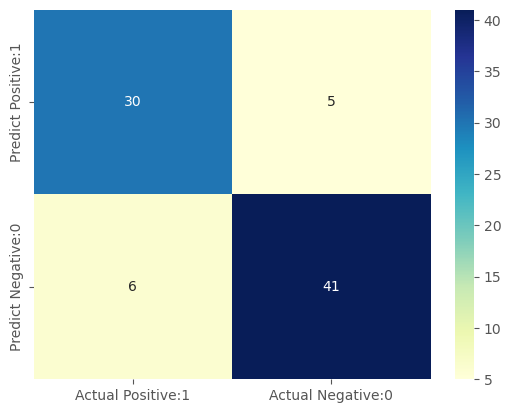

In [111]:
cm = confusion_matrix(y_test, gbc_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Kesimpulan